In [2]:
import json
import glob
import pandas as pd
import os
import seaborn as sns
import numpy as np
import csv
from sklearn.preprocessing import LabelEncoder
import zipfile
import json
from PIL import Image
import cv2
import random

# matplotlib에서 한글 폰트를 설정하는 방법
import matplotlib.pyplot as plt
plt.rc("font", family="malgun gothic")

# 음수 기호 출력 방법
import matplotlib
matplotlib.rcParams["axes.unicode_minus"]=False

# 그래프를 선명하게 출력하는 방법
%config InlineBackend.figure_format = "retina"

import warnings
warnings.filterwarnings('ignore')

In [2]:
categories = ['가구류', '고철류', '나무', '도기류', '비닐', '스티로폼', '유리병', '의류', '자전거', '전자제품', '종이류', '캔류', '페트병', '플라스틱류', '형광등']
zipfiles = [ file for file in os.listdir('data\생활 폐기물 이미지\Validation') if file.endswith('zip')]
cate_access = 0
cate_cnt = 0
total_cnt = 0

In [3]:
def get_label(dir):#  카테고리별 숫자 리턴
    if categories[0] in dir:
        return 0
    elif categories[1] in dir:
        return 1
    elif categories[2] in dir:
        return 2
    elif categories[3] in dir:
        return 3
    elif categories[4] in dir:
        return 4
    elif categories[5] in dir:
        return 5   
    elif categories[6] in dir:
        return 6
    elif categories[7] in dir:
        return 7
    elif categories[8] in dir:
        return 8
    elif categories[9] in dir:
        return 9
    elif categories[10] in dir:
        return 10
    elif categories[11] in dir:
        return 11
    elif categories[12] in dir:
        return 12
    elif categories[13] in dir:
        return 13
    elif categories[14] in dir:
        return 14
    
def get_bound(dir,name): # json 파일 내 정보를 읽어오기
    dir_01 = dir.split("]")[1].split("_") # 비닐, 종이류,,, / 과자봉지, 보호재...
    dir_02 = name.split("/")
    dir_03 = dir_02[1].split(".")
    path = f'C:/Users/yu/project/data/생활 폐기물 이미지/Validation_라벨링데이터/{dir_01[0]}/{dir_01[1]}/{dir_02[0]}/{dir_03[0]}.json'

    with open (path, "rt", encoding="UTF-8") as f: # json 파일을 읽어와서
        data = json.load(f)
        total_data = {}  # json 파일 내 정보를 저장
        
        if data["Bounding"][0]["Drawing"] == "BOX":
            total_data["name"]= data["FILE NAME"] # 파일 이름
            total_data["width"]= int(data["RESOLUTION"].split("*")[0]) # 해상도 가로
            total_data["height"]= int(data["RESOLUTION"].split("*")[1]) # 해상도 세로
            total_data["Count"] = data["BoundingCount"]  # 객체 수
            total_data["class"] = data["Bounding"][0]["CLASS"] # 객체 분류

            total_data["x1"] = int(data["Bounding"][0]["x1"])        # x축, y축 좌표
            total_data["x2"] = int(data["Bounding"][0]["x2"])
            total_data["y1"] = int(data["Bounding"][0]["y1"])
            total_data["y2"] = int(data["Bounding"][0]["y2"])
            
            if len(data["Bounding"]) >= 2 :        # 객체가 여러개인 경우 x축, y축 모두 저장
                if "x1" in data["Bounding"][1]:            
                    total_data["x1_2"] = int(data["Bounding"][1]["x1"])
                    total_data["x2_2"] = int(data["Bounding"][1]["x2"])
                    total_data["y1_2"] = int(data["Bounding"][1]["y1"])
                    total_data["y2_2"] = int(data["Bounding"][1]["y2"])

            if len(data["Bounding"]) >= 3 :
                if "x1" in data["Bounding"][2]:            
                    total_data["x1_3"] = int(data["Bounding"][2]["x1"])
                    total_data["x2_3"] = int(data["Bounding"][2]["x2"])
                    total_data["y1_3"] = int(data["Bounding"][2]["y1"])
                    total_data["y2_3"] = int(data["Bounding"][2]["y2"])

            if len(data["Bounding"]) >= 4 :            
                if "x1" in data["Bounding"][3]:                            
                    total_data["x1_4"] = int(data["Bounding"][3]["x1"])
                    total_data["x2_4"] = int(data["Bounding"][3]["x2"])
                    total_data["y1_4"] = int(data["Bounding"][3]["y1"])
                    total_data["y2_4"] = int(data["Bounding"][3]["y2"])

            if len(data["Bounding"]) >= 5 :            
                if "x1" in data["Bounding"][4]:            
                    total_data["x1_5"] = int(data["Bounding"][4]["x1"])
                    total_data["x2_5"] = int(data["Bounding"][4]["x2"])
                    total_data["y1_5"] = int(data["Bounding"][4]["y1"])
                    total_data["y2_5"] = int(data["Bounding"][4]["y2"])

            if len(data["Bounding"]) >= 6 :            
                if "x1" in data["Bounding"][5]:            
                    total_data["x1_6"] = int(data["Bounding"][5]["x1"])
                    total_data["x2_6"] = int(data["Bounding"][5]["x2"])
                    total_data["y1_6"] = int(data["Bounding"][5]["y1"])
                    total_data["y2_6"] = int(data["Bounding"][5]["y2"])

            if len(data["Bounding"]) >= 7 :            
                if "x1" in data["Bounding"][6]:            
                    total_data["x1_7"] = int(data["Bounding"][6]["x1"])
                    total_data["x2_7"] = int(data["Bounding"][6]["x2"])
                    total_data["y1_7"] = int(data["Bounding"][6]["y1"])
                    total_data["y2_7"] = int(data["Bounding"][6]["y2"])

            if len(data["Bounding"]) >= 8 :            
                if "x1" in data["Bounding"][7]:            
                    total_data["x1_8"] = int(data["Bounding"][7]["x1"])
                    total_data["x2_8"] = int(data["Bounding"][7]["x2"])
                    total_data["y1_8"] = int(data["Bounding"][7]["y1"])
                    total_data["y2_8"] = int(data["Bounding"][7]["y2"])
                    
            return total_data
        else:
            return ""

In [4]:
val_df = pd.DataFrame()

for index_zip,zips in enumerate(zipfiles):
    dir = "C:/Users/yu/project/data/생활 폐기물 이미지/Validation/"+zips

    if categories[cate_access] in zips: # 카테고리별 이미지 개수 제한
        with zipfile.ZipFile(dir, 'r') as obj:
            zip_namelist = obj.namelist()      
            for index_file,name in enumerate(zip_namelist) :
                if name.endswith('.jpg') :   
                    label = get_label(dir)
                    bound = get_bound(dir,name) #csv 파일로 바꾸는 함수
                 
                    if bound != "":
                        img = Image.open(obj.open(name)).convert("RGB")
                        img = img.resize((256,256))
                        img.save(f'C:/Users/yu/project/data/images/{name.split("/")[1]}','JPEG')
                        
                        val_df = pd.concat([val_df, pd.DataFrame(get_bound(dir,name),index = [0])], axis = 0, join = 'outer')      
                        cate_cnt+=1
                        total_cnt+=1

                        if total_cnt%100==0:
                            print(f"{categories[cate_access]} {cate_cnt} (total:{total_cnt})")

                    if cate_cnt==2000: # 카테고리별 2000장만 추출
                        cate_access+=1
                        cate_cnt=0
                        break

가구류 100 (total:100)
가구류 200 (total:200)
가구류 300 (total:300)
가구류 400 (total:400)
가구류 500 (total:500)
가구류 600 (total:600)
가구류 700 (total:700)
가구류 800 (total:800)
가구류 900 (total:900)
가구류 1000 (total:1000)
가구류 1100 (total:1100)
가구류 1200 (total:1200)
가구류 1300 (total:1300)
가구류 1400 (total:1400)
가구류 1500 (total:1500)
가구류 1600 (total:1600)
가구류 1700 (total:1700)
가구류 1800 (total:1800)
가구류 1900 (total:1900)
가구류 2000 (total:2000)
고철류 100 (total:2100)
고철류 200 (total:2200)
고철류 300 (total:2300)
고철류 400 (total:2400)
고철류 500 (total:2500)
고철류 600 (total:2600)
고철류 700 (total:2700)
고철류 800 (total:2800)
고철류 900 (total:2900)
고철류 1000 (total:3000)
고철류 1100 (total:3100)
고철류 1200 (total:3200)
고철류 1300 (total:3300)
고철류 1400 (total:3400)
고철류 1500 (total:3500)
고철류 1600 (total:3600)
고철류 1700 (total:3700)
고철류 1800 (total:3800)
고철류 1900 (total:3900)
고철류 2000 (total:4000)
나무 100 (total:4100)
나무 200 (total:4200)
나무 300 (total:4300)
나무 400 (total:4400)
나무 500 (total:4500)
나무 600 (total:4600)
나무 700 (total:4700)
나무 800 

IndexError: list index out of range

In [17]:
val_df.to_csv('./data/val_df.csv', header=True, index=False,encoding='ms949') # csv파일로 만들어서 저장

In [49]:
df= pd.read_csv('./data/labels/val_df.csv', encoding='cp949')

print('aihub 이미지 개수:', len(glob.glob('data/images/*.jpg')))
print('aihub 라벨 개수:', len(df['class'].unique()))
print('aihub 라벨 이름:', df['class'].unique())

aihub 이미지 개수: 30000
aihub 라벨 개수: 15
aihub 라벨 이름: ['가구류' '고철류' '전자제품' '나무류' '종이류' '도기류' '비닐류' '스티로폼류' '유리병류' '의류' '자전거' '캔류'
 '페트병류' '플라스틱류' '형광등']


In [50]:
df

name  width  height  Count class   x1    x2   y1  \
0      11_X001_C014_0130_0.jpg   2221    1080      1   가구류  927  1411  239   
1      11_X001_C014_0130_1.jpg   2221    1080      1   가구류  735  1582   78   
2      11_X001_C014_0130_2.jpg   2221    1080      1   가구류  657  1451  136   
3      11_X001_C014_0130_3.jpg   2221    1080      1   가구류  814  1596  169   
4      11_X001_C014_0130_4.jpg   2221    1080      1   가구류  552  1445  197   
...                        ...    ...     ...    ...   ...  ...   ...  ...   
29995  25_X002_C211_1207_0.jpg   1920    1440      1   형광등  219  1750  662   
29996  25_X002_C211_1207_1.jpg   1920    1440      1   형광등  105  1867  554   
29997  25_X002_C211_1207_2.jpg   1920    1440      1   형광등  114  1726  486   
29998  25_X002_C211_1207_3.jpg   1920    1440      1   형광등  740  1097   94   
29999  25_X002_C211_1207_4.jpg   1920    1440      1   형광등  673  1013  112   

         y2  x1_2  ...  y1_2  y2_2  x1_3  x2_3  y1_3  y2_3  x1_4  x2_4  y1_4  \
0       570   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1       782   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2       689   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3       747   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4       843   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...     ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
29995   832   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29996   740   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29997   749   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29998  1121   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
29999  1188   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       y2_4  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
29995   NaN  
29996   NaN  
29997   NaN  
29998   NaN  
29999   NaN  

[30000 rows x 21 columns]

In [51]:
columns_df = df.columns.to_list()[:9] # 사진 하나에 여러 항목인 경우 항목별 좌표 따로 구하기
empty_pd = pd.DataFrame(columns=columns_df)
print(empty_pd)
for i in range(len(df)):
    if int(df.loc[i]["Count"]) > 1:
        new_list= [[df.loc[i]['name'], df.loc[i]['width'], df.loc[i]['height'], df.loc[i]['Count'], df.loc[i]['class'], df.loc[i]['x1'], df.loc[i]['x2'], df.loc[i]['y1'], df.loc[i]['y2']] ]
        add_row = pd.DataFrame(new_list, columns=columns_df)
        empty_pd = pd.concat([empty_pd,add_row])
empty_pd # 3885 rows × 9 columns

Empty DataFrame
Columns: [name, width, height, Count, class, x1, x2, y1, y2]
Index: []


name width height Count class    x1    x2   y1    y2
0   11_X001_C033_1013_1.jpg  1920   1440     2   가구류   820  1163  413  1214
0   11_X001_C033_1013_2.jpg  1920   1440     2   가구류   462  1346  410   922
0   11_X001_C033_1013_3.jpg  1920   1440     2   가구류   521  1340  402   810
0   11_X003_C051_1006_1.jpg  1920   1440     2   가구류   668  1481  165  1301
0   11_X002_C055_1113_0.jpg  1920   1080     2   가구류   118  1688  203   874
..                      ...   ...    ...   ...   ...   ...   ...  ...   ...
0   25_X038_C509_0129_0.jpg  1921   1080     2   형광등  1045  1235  474   788
0   25_X038_C509_0129_1.jpg  1921   1080     2   형광등  1056  1274  334   688
0   25_X038_C509_0129_2.jpg  1921   1080     2   형광등  1075  1247  401   673
0   25_X038_C509_0129_3.jpg  1921   1080     2   형광등  1044  1167  397   585
0   25_X038_C509_0129_4.jpg  1921   1080     2   형광등   885   985  320   462

[3885 rows x 9 columns]

In [52]:
df_new = pd.concat([df,empty_pd]) # 기존 정보와 새로 구한 좌표 더하기 
df_new # 33885 rows × 21 columns

name width height Count class    x1    x2   y1   y2  \
0   11_X001_C014_0130_0.jpg  2221   1080     1   가구류   927  1411  239  570   
1   11_X001_C014_0130_1.jpg  2221   1080     1   가구류   735  1582   78  782   
2   11_X001_C014_0130_2.jpg  2221   1080     1   가구류   657  1451  136  689   
3   11_X001_C014_0130_3.jpg  2221   1080     1   가구류   814  1596  169  747   
4   11_X001_C014_0130_4.jpg  2221   1080     1   가구류   552  1445  197  843   
..                      ...   ...    ...   ...   ...   ...   ...  ...  ...   
0   25_X038_C509_0129_0.jpg  1921   1080     2   형광등  1045  1235  474  788   
0   25_X038_C509_0129_1.jpg  1921   1080     2   형광등  1056  1274  334  688   
0   25_X038_C509_0129_2.jpg  1921   1080     2   형광등  1075  1247  401  673   
0   25_X038_C509_0129_3.jpg  1921   1080     2   형광등  1044  1167  397  585   
0   25_X038_C509_0129_4.jpg  1921   1080     2   형광등   885   985  320  462   

    x1_2  ...  y1_2  y2_2  x1_3  x2_3  y1_3  y2_3  x1_4  x2_4  y1_4  y2_4  
0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
..   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[33885 rows x 21 columns]

In [53]:
df_new = df_new.iloc[:, :9] # 필요없는 좌표 삭제
df_new

name width height Count class    x1    x2   y1   y2
0   11_X001_C014_0130_0.jpg  2221   1080     1   가구류   927  1411  239  570
1   11_X001_C014_0130_1.jpg  2221   1080     1   가구류   735  1582   78  782
2   11_X001_C014_0130_2.jpg  2221   1080     1   가구류   657  1451  136  689
3   11_X001_C014_0130_3.jpg  2221   1080     1   가구류   814  1596  169  747
4   11_X001_C014_0130_4.jpg  2221   1080     1   가구류   552  1445  197  843
..                      ...   ...    ...   ...   ...   ...   ...  ...  ...
0   25_X038_C509_0129_0.jpg  1921   1080     2   형광등  1045  1235  474  788
0   25_X038_C509_0129_1.jpg  1921   1080     2   형광등  1056  1274  334  688
0   25_X038_C509_0129_2.jpg  1921   1080     2   형광등  1075  1247  401  673
0   25_X038_C509_0129_3.jpg  1921   1080     2   형광등  1044  1167  397  585
0   25_X038_C509_0129_4.jpg  1921   1080     2   형광등   885   985  320  462

[33885 rows x 9 columns]

In [54]:
df_new.info() # 결측치 없이 33885 row 데이터 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33885 entries, 0 to 0
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    33885 non-null  object
 1   width   33885 non-null  object
 2   height  33885 non-null  object
 3   Count   33885 non-null  object
 4   class   33885 non-null  object
 5   x1      33885 non-null  object
 6   x2      33885 non-null  object
 7   y1      33885 non-null  object
 8   y2      33885 non-null  object
dtypes: object(9)
memory usage: 2.6+ MB


In [55]:
df_new = df_new.sort_values(by=['name']) # 파일명에 맞춰 정렬 
df_new = df_new.reset_index(drop=True) #인덱스 재설정

df_new['width'] = df_new['width'].astype(int) # int형으로 변환
df_new['height'] = df_new['height'].astype(int) 
df_new['x1'] = df_new['x1'].astype(int)
df_new['x2'] = df_new['x2'].astype(int)
df_new['y1'] = df_new['y1'].astype(int)
df_new['y2'] = df_new['y2'].astype(int)

df_new['object_x'] = df_new['x2']-df_new['x1'] # 객체 너비 object_x열 추가
df_new['object_y'] = df_new['y2']-df_new['y1'] # 객체 높이 object_y열 추가



df_new

name  width  height Count class   x1    x2   y1  \
0      11_X001_C014_0130_0.jpg   2221    1080     1   가구류  927  1411  239   
1      11_X001_C014_0130_1.jpg   2221    1080     1   가구류  735  1582   78   
2      11_X001_C014_0130_2.jpg   2221    1080     1   가구류  657  1451  136   
3      11_X001_C014_0130_3.jpg   2221    1080     1   가구류  814  1596  169   
4      11_X001_C014_0130_4.jpg   2221    1080     1   가구류  552  1445  197   
...                        ...    ...     ...   ...   ...  ...   ...  ...   
33880  25_X616_C900_1104_0.jpg   1920    1440     1   형광등  910  1077  700   
33881  25_X616_C900_1104_1.jpg   1920    1440     1   형광등  667  1500  665   
33882  25_X616_C900_1104_2.jpg   1920    1440     1   형광등  604  1114  362   
33883  25_X616_C900_1104_3.jpg   1920    1440     1   형광등  385  1284  490   
33884  25_X616_C900_1104_4.jpg   1920    1440     1   형광등  586  1424  299   

         y2  object_x  object_y  
0       570       484       331  
1       782       847       704  
2       689       794       553  
3       747       782       578  
4       843       893       646  
...     ...       ...       ...  
33880   808       167       108  
33881  1182       833       517  
33882  1172       510       810  
33883  1087       899       597  
33884  1097       838       798  

[33885 rows x 11 columns]

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33885 entries, 0 to 33884
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      33885 non-null  object
 1   width     33885 non-null  int32 
 2   height    33885 non-null  int32 
 3   Count     33885 non-null  object
 4   class     33885 non-null  object
 5   x1        33885 non-null  int32 
 6   x2        33885 non-null  int32 
 7   y1        33885 non-null  int32 
 8   y2        33885 non-null  int32 
 9   object_x  33885 non-null  int32 
 10  object_y  33885 non-null  int32 
dtypes: int32(8), object(3)
memory usage: 1.8+ MB


In [57]:
df_new.describe() # 기본 통계 확인

width        height            x1            x2            y1  \
count  33885.000000  33885.000000  33885.000000  33885.000000  33885.000000   
mean    1879.537347   1351.771816    549.363848   1275.365944    331.336904   
std      170.790085    272.155481    249.139664    278.094537    192.303913   
min     1080.000000   1080.000000      0.000000    289.000000      0.000000   
25%     1920.000000   1080.000000    368.000000   1098.000000    187.000000   
50%     1920.000000   1440.000000    541.000000   1282.000000    302.000000   
75%     1921.000000   1440.000000    714.000000   1473.000000    444.000000   
max     2442.000000   2282.000000   1554.000000   2441.000000   1507.000000   

                 y2      object_x      object_y  
count  33885.000000  33885.000000  33885.000000  
mean     949.519492    726.002095    618.182588  
std      250.571953    363.551468    280.551464  
min      139.000000     40.000000     38.000000  
25%      784.000000    440.000000    401.000000  
50%      938.000000    668.000000    595.000000  
75%     1109.000000    956.000000    809.000000  
max     1921.000000   2437.000000   1920.000000

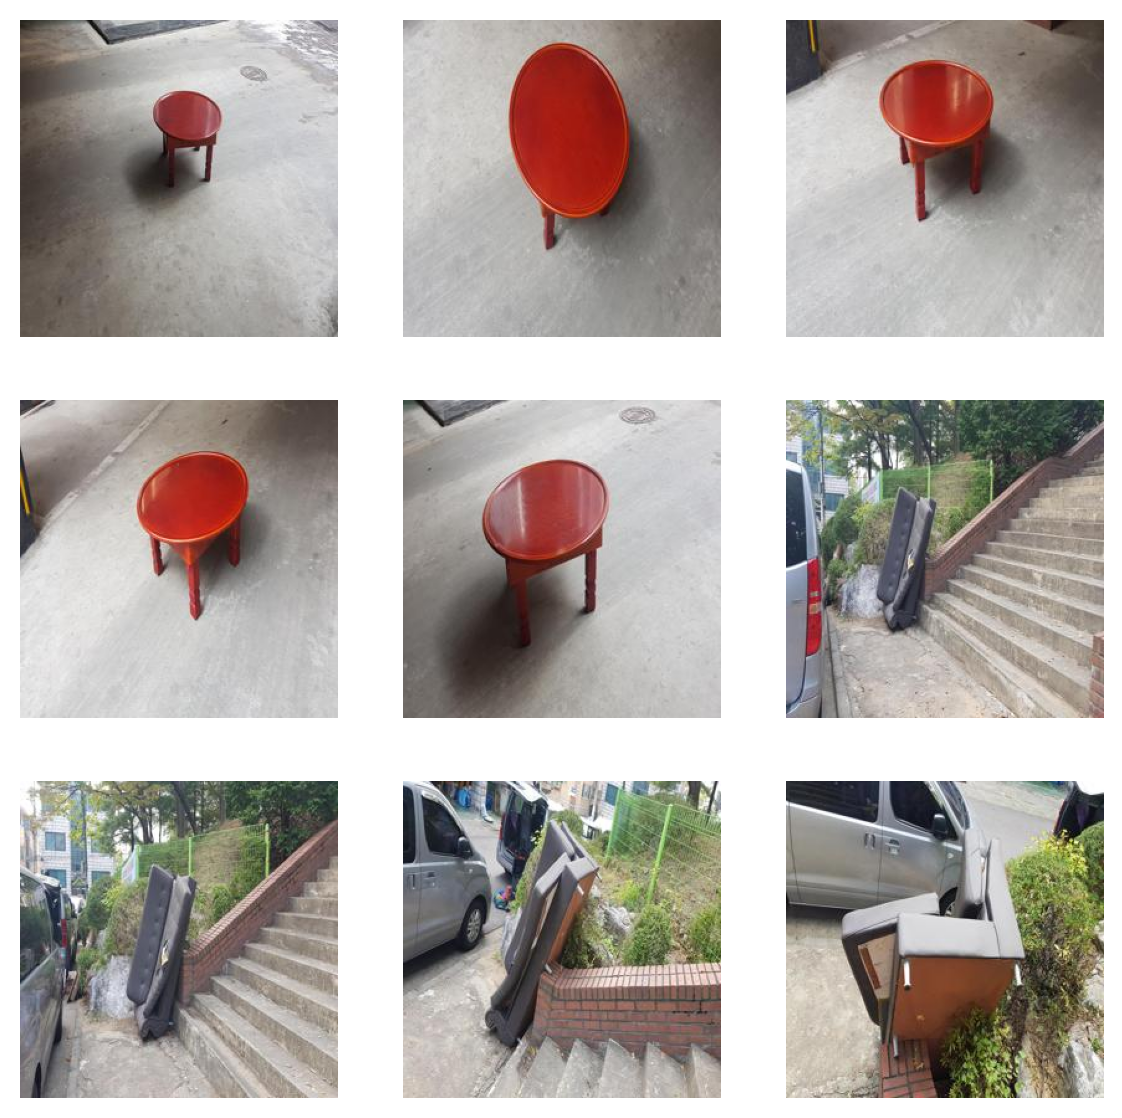

In [58]:
images = glob.glob('./data/images/**')
plt.figure(figsize=(7, 7))
for i in range(9):    
    ax = plt.subplot(3, 3, i + 1)
    img_test = Image.open(images[i])    
    plt.imshow(img_test)        
    plt.axis("off")
plt.show()

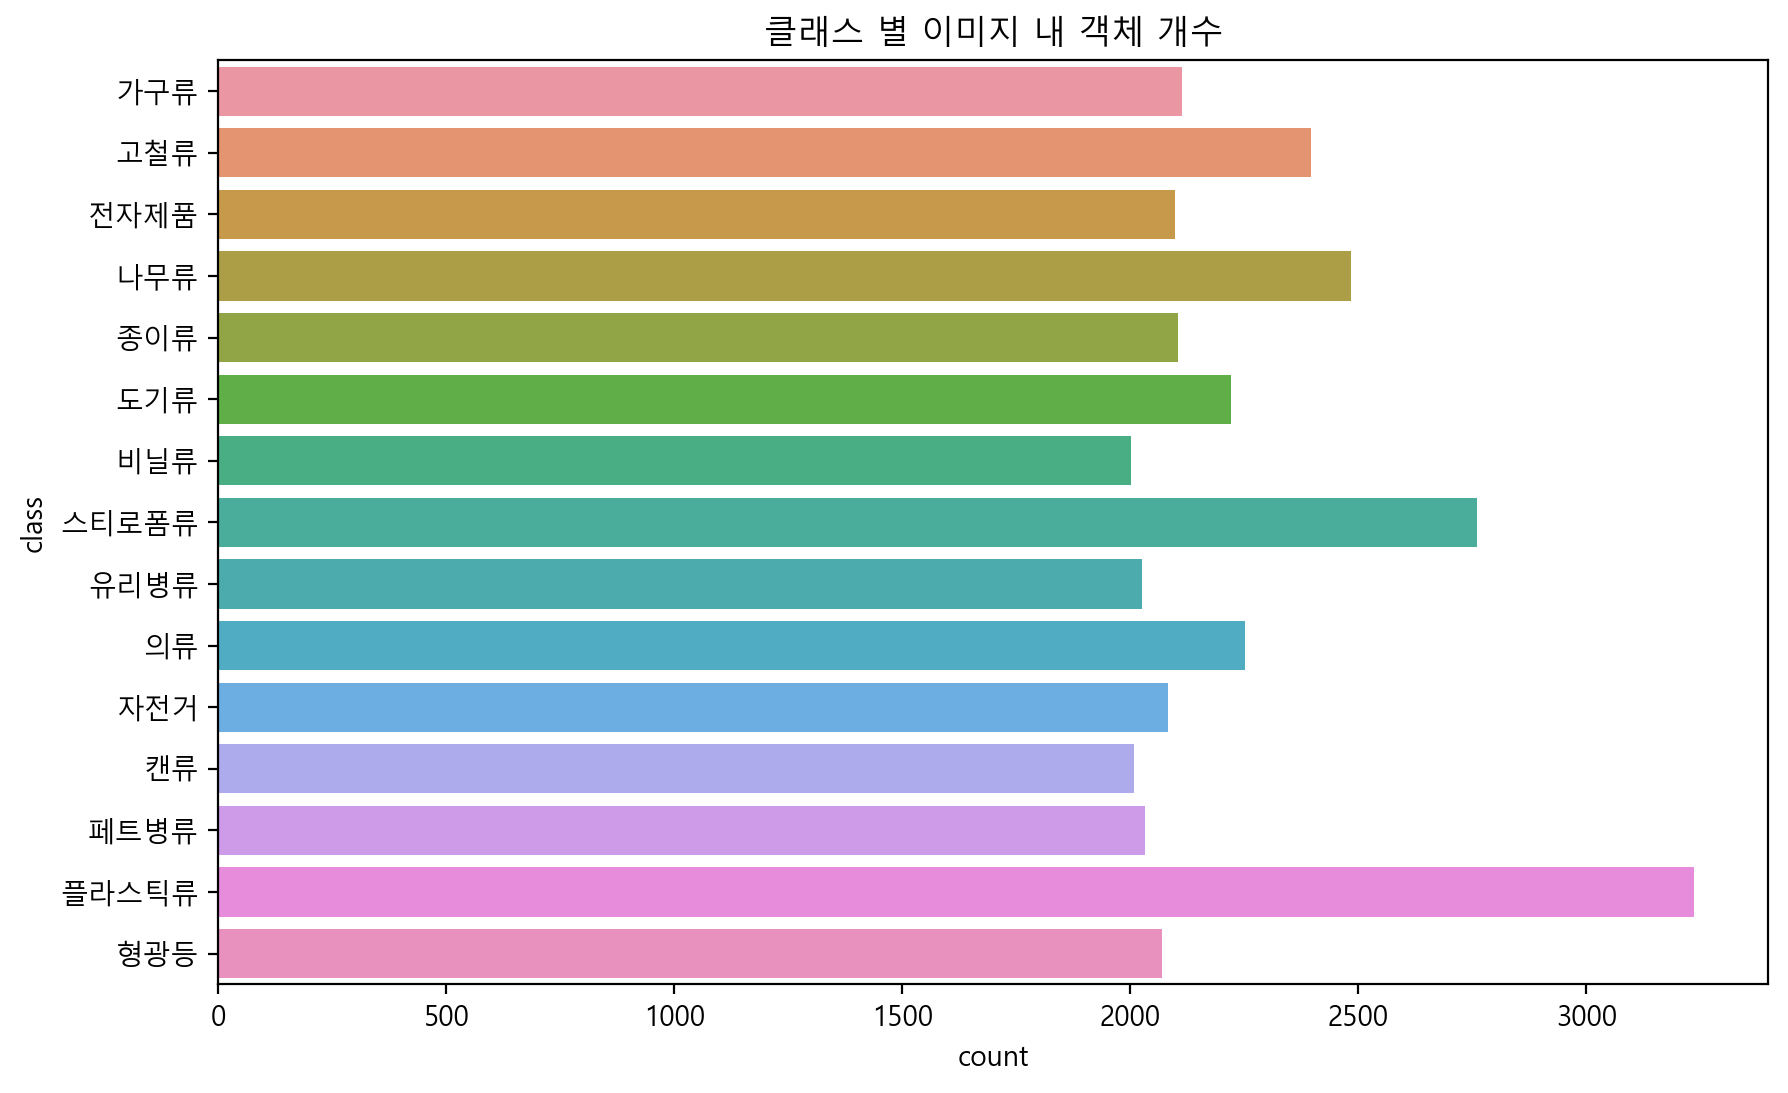

In [59]:
plt.figure(figsize=(10, 6))
plt.title('클래스 별 이미지 내 객체 개수', fontname ='malgun gothic')
sns.countplot(y='class', data=df_new);

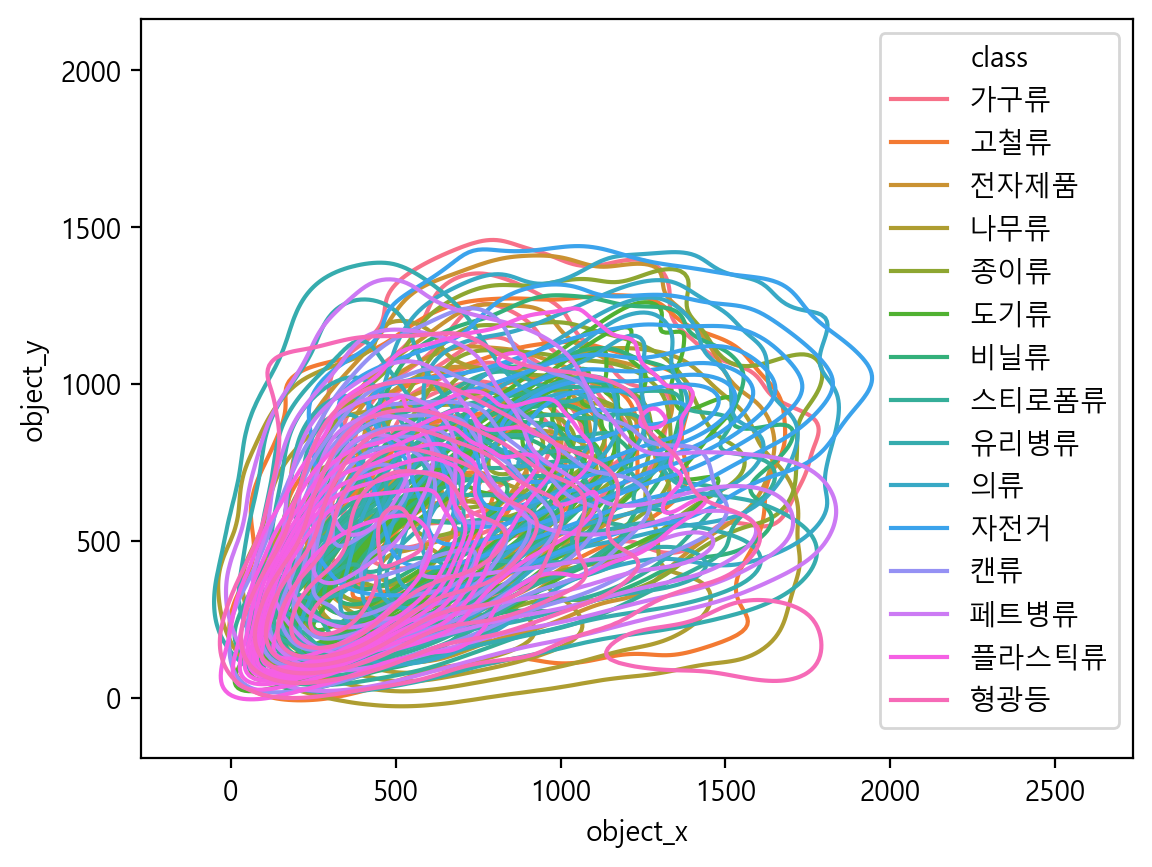

In [60]:
sns.kdeplot(data=df_new, x='object_x', y="object_y", hue="class"); # 클래스 별 객체의 가로, 세로길이 분포    

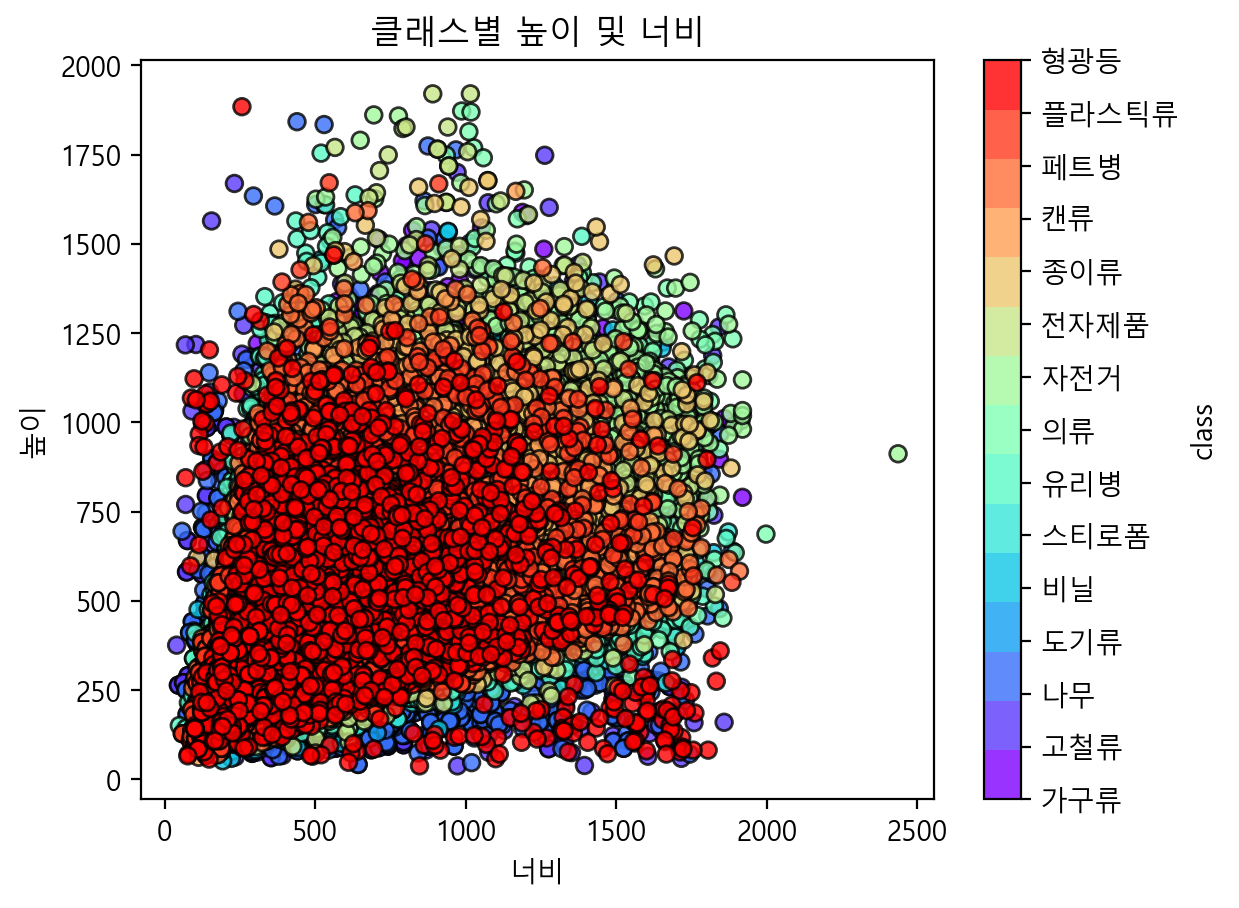

In [61]:
plt.scatter(df_new['object_x'], df_new['object_y'],alpha=0.8,edgecolors='black', c=df_new['class'].astype('category').cat.codes, cmap=plt.cm.get_cmap('rainbow', len(df_new['class'].unique())))
plt.title('클래스별 높이 및 너비', fontname ='malgun gothic')
plt.xlabel('너비', fontname ='malgun gothic')
plt.ylabel('높이', fontname ='malgun gothic')
cb=plt.colorbar(ticks=range(15), label='class')
cb.set_ticklabels(['가구류', '고철류', '나무', '도기류', '비닐', '스티로폼', '유리병', '의류', '자전거', '전자제품', '종이류', '캔류', '페트병', '플라스틱류', '형광등'], fontname ='malgun gothic')
plt.show()

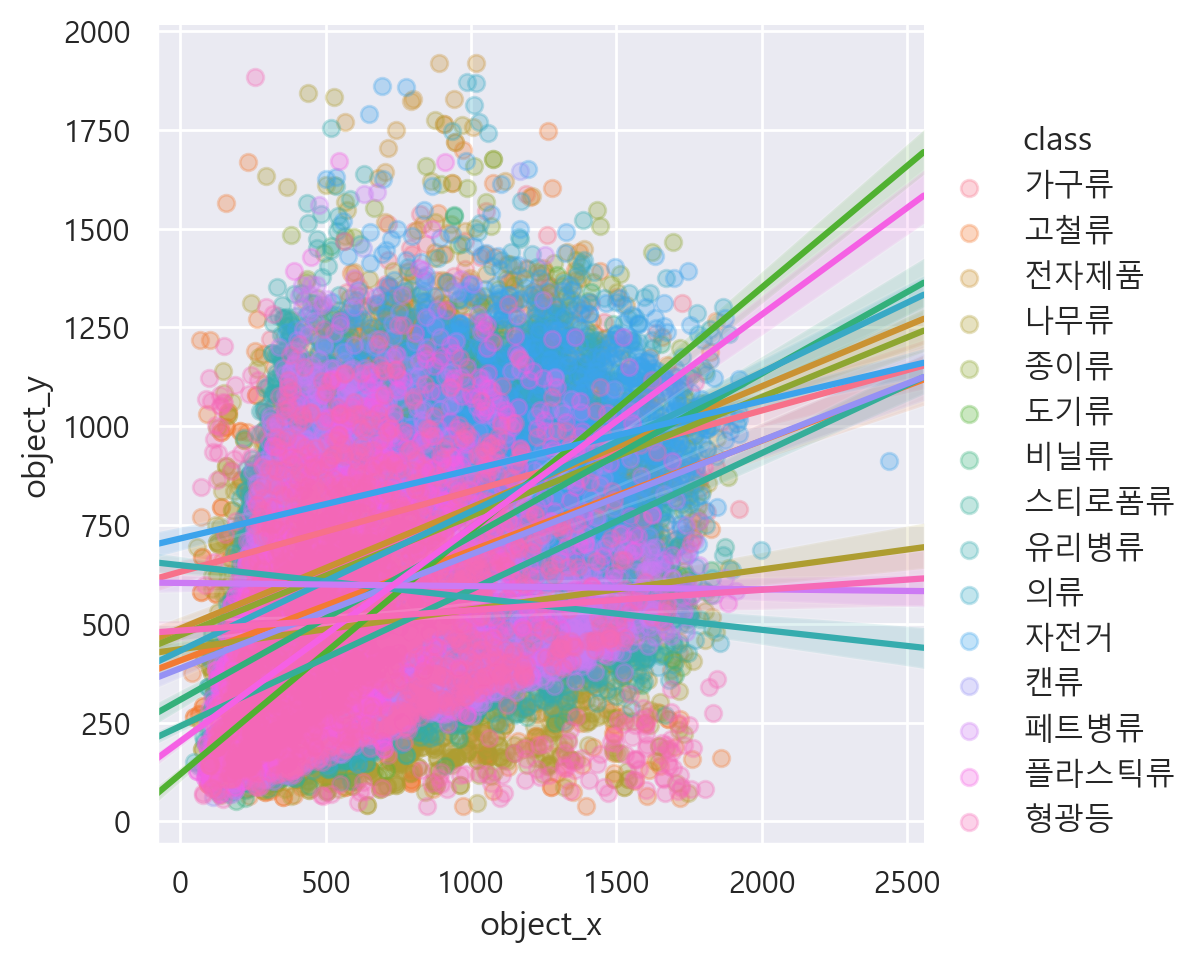

In [62]:
sns.set(font="malgun gothic") # 선형관계 확인 : 특별한 건 없다
sns.lmplot(x='object_x', y='object_y', hue = 'class', data = df_new, scatter_kws = {'alpha': 0.3}, truncate=False)
plt.show()

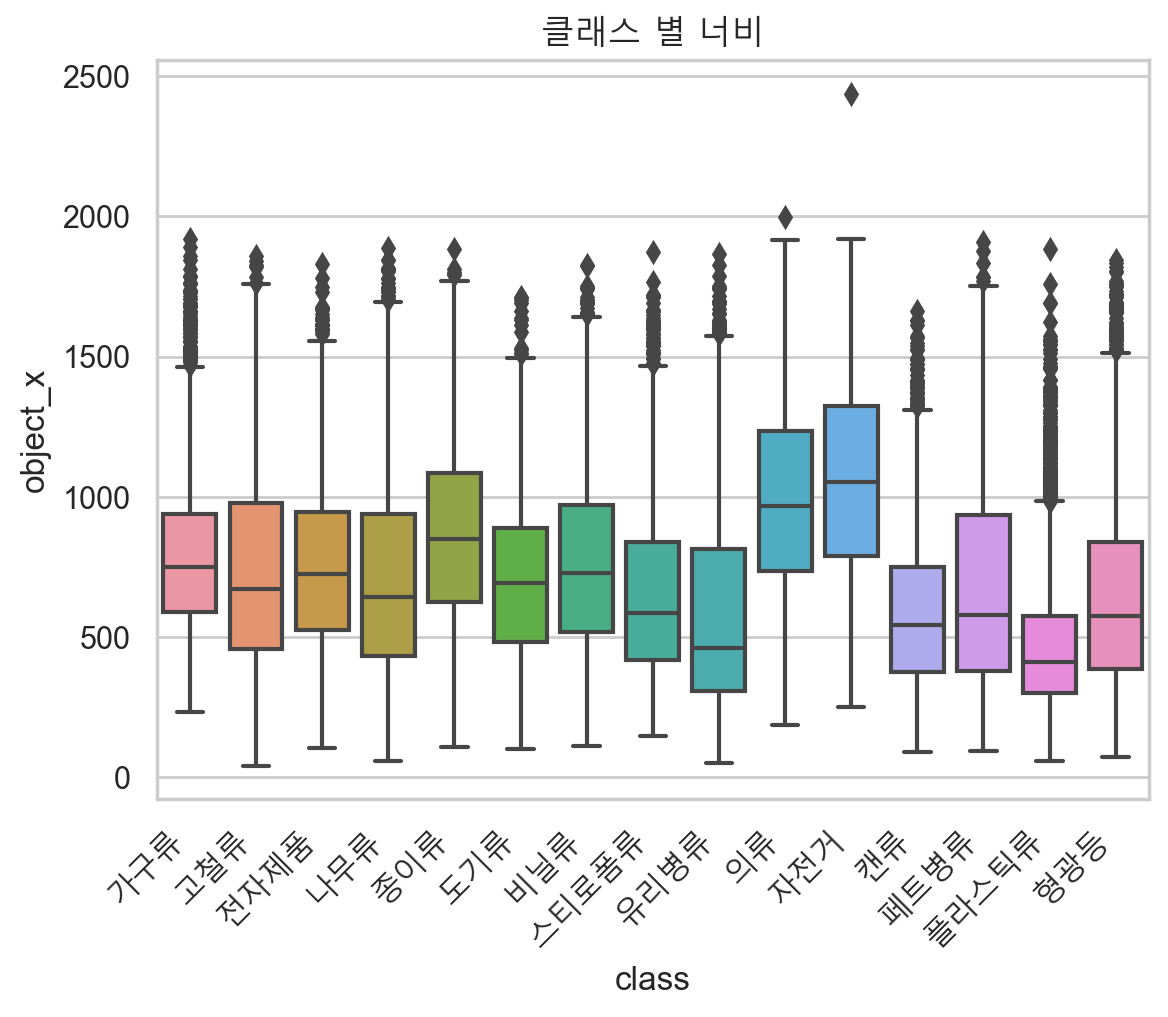

In [63]:
sns.set(style='whitegrid')
plt.xticks(rotation=45, ha = 'right', fontname ='malgun gothic')
plt.title('클래스 별 너비', fontname ='malgun gothic')
sns.boxplot(x="class", y=df_new['object_x'], data=df_new);

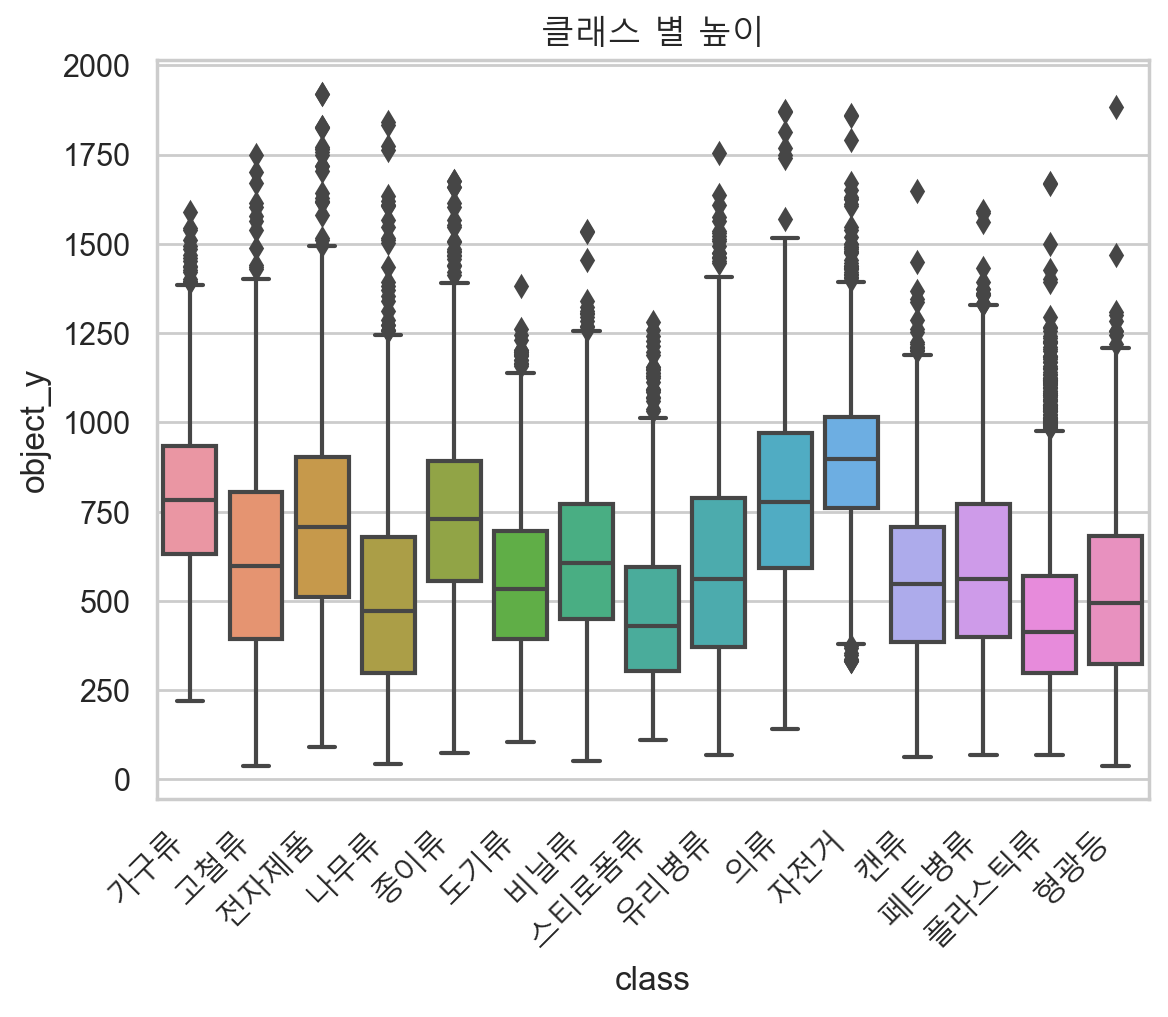

In [64]:
sns.set(style='whitegrid')
plt.xticks(rotation=45, ha = 'right', fontname ='malgun gothic')
plt.title('클래스 별 높이', fontname ='malgun gothic')
sns.boxplot(x="class", y=df_new['object_y'], data=df_new);

In [65]:
df_new[df_new['object_x'] > 2000 ]

name  width  height Count class  x1    x2   y1  \
19506  19_X005_C055_1211_2.jpg   2442    1080     1   자전거   4  2441  167   

         y2  object_x  object_y  
19506  1079      2437       912

In [66]:
img = cv2.imread('./data/images/19_X005_C055_1211_2.jpg', cv2.IMREAD_COLOR)

# 사각형 그리기
img = cv2.rectangle(img, (0, 39), (255, 255), (255, 0, 0), 3)
 
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
df_new[df_new['object_y'] > 1900 ]

name  width  height Count class   x1    x2  y1  \
21274  20_X006_C012_1215_1.jpg   1440    1920     1  전자제품  182  1073   0   
21276  20_X006_C012_1215_3.jpg   1440    1920     1  전자제품  217  1233   0   

         y2  object_x  object_y  
21274  1920       891      1920  
21276  1920      1016      1920

In [68]:
img = cv2.imread('./data/images/20_X006_C012_1215_1.jpg', cv2.IMREAD_COLOR)

# 사각형 그리기
img = cv2.rectangle(img, (32, 0), (190, 256), (255, 0, 0), 3)
 
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
img = cv2.imread('./data/images/20_X006_C012_1215_3.jpg', cv2.IMREAD_COLOR)

# 사각형 그리기
img = cv2.rectangle(img, (38, 0), (219, 256), (255, 0, 0), 3)
 
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [70]:
df_new

name  width  height Count class   x1    x2   y1  \
0      11_X001_C014_0130_0.jpg   2221    1080     1   가구류  927  1411  239   
1      11_X001_C014_0130_1.jpg   2221    1080     1   가구류  735  1582   78   
2      11_X001_C014_0130_2.jpg   2221    1080     1   가구류  657  1451  136   
3      11_X001_C014_0130_3.jpg   2221    1080     1   가구류  814  1596  169   
4      11_X001_C014_0130_4.jpg   2221    1080     1   가구류  552  1445  197   
...                        ...    ...     ...   ...   ...  ...   ...  ...   
33880  25_X616_C900_1104_0.jpg   1920    1440     1   형광등  910  1077  700   
33881  25_X616_C900_1104_1.jpg   1920    1440     1   형광등  667  1500  665   
33882  25_X616_C900_1104_2.jpg   1920    1440     1   형광등  604  1114  362   
33883  25_X616_C900_1104_3.jpg   1920    1440     1   형광등  385  1284  490   
33884  25_X616_C900_1104_4.jpg   1920    1440     1   형광등  586  1424  299   

         y2  object_x  object_y  
0       570       484       331  
1       782       847       704  
2       689       794       553  
3       747       782       578  
4       843       893       646  
...     ...       ...       ...  
33880   808       167       108  
33881  1182       833       517  
33882  1172       510       810  
33883  1087       899       597  
33884  1097       838       798  

[33885 rows x 11 columns]

In [71]:
df_new['x'] = (df_new['x2']+df_new['x1'])/df_new['width'] # yolo용 좌표 x
df_new['y'] = (df_new['y2']+df_new['y1'])/df_new['height'] # yolo용 좌표 y
df_new['box_x'] = (df_new['x2']-df_new['x1'])/df_new['width'] # yolo용 좌표 x
df_new['box_y'] = (df_new['y2']-df_new['y1'])/df_new['height'] # yolo용 좌표 y

drop_list = ['Count','width','height','x1','x2','y1','y2','object_x','object_y']
df_new = df_new.drop(drop_list,axis=1)
df_new

name class         x         y     box_x     box_y
0      11_X001_C014_0130_0.jpg   가구류  1.052679  0.749074  0.217920  0.306481
1      11_X001_C014_0130_1.jpg   가구류  1.043224  0.796296  0.381360  0.651852
2      11_X001_C014_0130_2.jpg   가구류  0.949122  0.763889  0.357497  0.512037
3      11_X001_C014_0130_3.jpg   가구류  1.085097  0.848148  0.352094  0.535185
4      11_X001_C014_0130_4.jpg   가구류  0.899145  0.962963  0.402071  0.598148
...                        ...   ...       ...       ...       ...       ...
33880  25_X616_C900_1104_0.jpg   형광등  1.034896  1.047222  0.086979  0.075000
33881  25_X616_C900_1104_1.jpg   형광등  1.128646  1.282639  0.433854  0.359028
33882  25_X616_C900_1104_2.jpg   형광등  0.894792  1.065278  0.265625  0.562500
33883  25_X616_C900_1104_3.jpg   형광등  0.869271  1.095139  0.468229  0.414583
33884  25_X616_C900_1104_4.jpg   형광등  1.046875  0.969444  0.436458  0.554167

[33885 rows x 6 columns]

In [72]:
dic = {'가구류': '0', '고철류': '1', '나무류': '2', '도기류': '3', '비닐류': '4', '스티로폼류': '5', '유리병류': '6', '의류': '7', '자전거': '8', '전자제품': '9', '종이류': '10', '캔류': '11', '페트병류': '12', '플라스틱류': '13', '형광등': '14'}

df_new['class'] = df_new['class'].apply(lambda x : x.replace(x, dic[x]))
df_new['class'] = df_new['class'].astype(int)

In [73]:
df_new.rename(columns={'name' : 'file_name', 'class':'label'}, inplace=True)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33885 entries, 0 to 33884
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   file_name  33885 non-null  object 
 1   label      33885 non-null  int32  
 2   x          33885 non-null  float64
 3   y          33885 non-null  float64
 4   box_x      33885 non-null  float64
 5   box_y      33885 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 1.4+ MB


In [74]:
df_new.to_csv('./data/df_aihub_eda.csv', header=True, index=False,encoding='ms949')

In [75]:
#